# Case Study 1: Hydrologic models of soil physical processes from the NWM and TOPMODEL

The scaling group did x,y,z...

In [1]:
# import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read in parameter sets and objective functions
df_parms = pd.read_csv('parameters.csv')
df_of = pd.read_csv('objective_function_NSE.csv')

### 1. Plot timeseries

In [2]:
# plot timeseries? need observation data

### 2. Approximate Bayesian Computation

In [ ]:
# %load approx_bayes_calc_of_defined.py
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

'''
Approximate Baysian Calculation requires:
    1) observation dataset (df_obs)
    2) parameter sets (df_parms)
    3) model output (df_model)
    4) objective functions (df_OFs)
    5) tolerance
    6) number of model runs
'''

def approx_bayes_calc_OF(parms,OFs,simulations):
    keep_nse = []
    for i in np.arange(simulations):
        # User can redefine tolerance and OF here
        if OFs.iloc[i,0] >= tolerance_nse:
            keep_nse.append(parms.iloc[i,:])        
    return keep_nse

plt.rcParams.update({'font.size': 16})
def make_histograms(df_parms,bayes_approx,bins,alpha,cc1,cc2,parameters,metric):
    plt.figure(figsize=(15,9))
    for col in np.arange(1,((df_parms.iloc[0,:]).size)):
        plt.subplot(4,4,col)
        ax = df_parms.iloc[:,col].plot.hist(bins=bins,alpha=alpha,color=cc1)    
        ax = bayes_approx.iloc[:,col].plot.hist(bins=bins,alpha=alpha,color=cc2)
        ax.set_xlabel(str(parameters[col]))    
    plt.legend(['Output','ABC'],fancybox=True)
    plt.tight_layout() 
    plt.savefig(metric+'.png',dpi=300)

def runABC(df_parms,df_OFs,runs,bins,color1,color2,metric):
    # models with objective functions within tolerance thresholds
    results_nse = np.array(approx_bayes_calc_OF(df_parms,df_OFs,runs))

    # saves models with objective functions within tolerance thresholds
    bayes_approx_nse = pd.DataFrame(results_nse,columns=None)
    bayes_approx_nse.to_csv('bayes_parameters_'+metric+'.csv',index=False)
    parameters = list(df_parms.columns.values)
    
    # print ABC results and make figures
    print('precent of models with NSE >= to',str(tolerance_nse),'are:',str(len(results_nse)/runs),'%')
    make_histograms(df_parms,bayes_approx_nse,bins,0.5,color1,color2,parameters,metric)


precent of models with NSE >= to 0.0 are: 0.5262 %
precent of models with NSE >= to 0.15 are: 0.1434 %


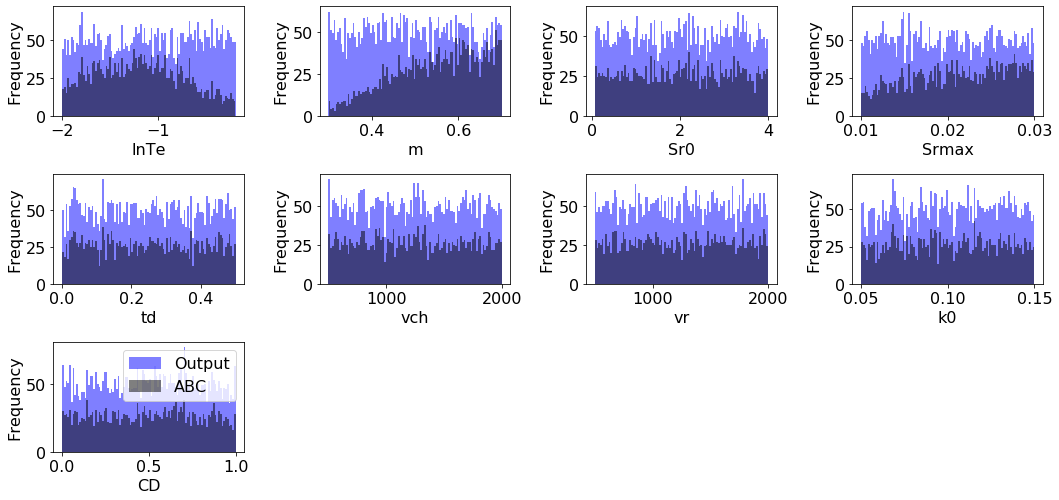

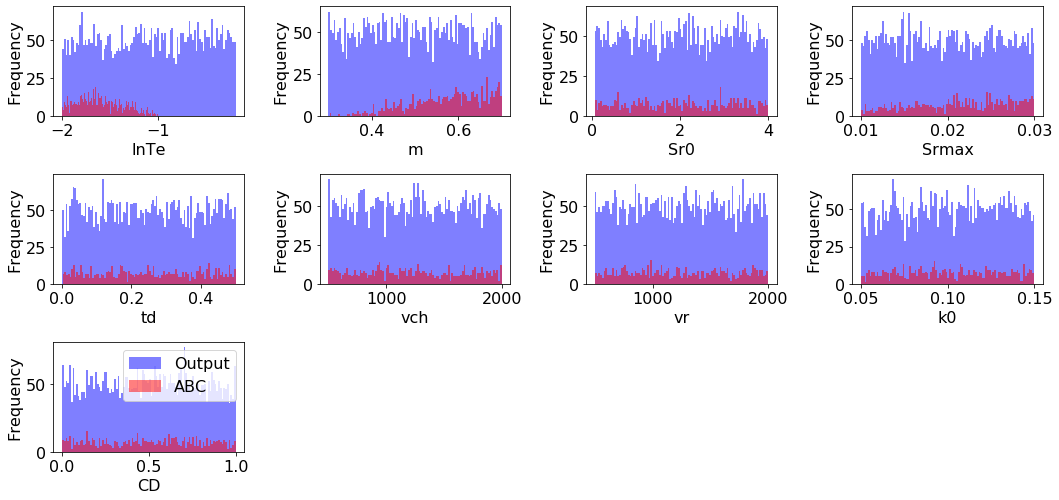

In [4]:
runs = 5000  # specify the number of model runs
bins = 100   # specify number of histogram bins
color1 = 'b' # color of all models
color2 = 'k' # color of first ABC tolerance
color3 = 'r' # color of second ABC tolerance

tolerance_nse = 0.0 # keep NSE >= 0.0
runABC(df_parms,df_of,runs,bins,color1,color2,'NSE_'+str(tolerance_nse))

tolerance_nse = 0.15 # keep NSE >= 0.15
runABC(df_parms,df_of,runs,bins,color1,color3,'NSE_'+str(tolerance_nse))